In [ ]:
# read data using fosfor ml 

In [1]:
!pip install fosforml==1.1.7

     |████████████████████████████████| 40kB 4.7MB/s eta 0:00:011
     |████████████████████████████████| 10.9MB 47.6MB/s eta 0:00:01
     |████████████████████████████████| 1.9MB 88.7MB/s eta 0:00:01
     |████████████████████████████████| 38.6MB 69.5MB/s eta 0:00:01 eta 0:00:01��█████████▊                | 19.0MB 69.5MB/s eta 0:00:01
     |████████████████████████████████| 307kB 91.4MB/s eta 0:00:01
     |████████████████████████████████| 133kB 94.5MB/s eta 0:00:01
     |████████████████████████████████| 61kB 19.1MB/s eta 0:00:01
     |████████████████████████████████| 81kB 30.1MB/s  eta 0:00:01
     |████████████████████████████████| 39.9MB 74.8MB/s eta 0:00:01
     |████████████████████████████████| 174kB 70.8MB/s eta 0:00:01
     |████████████████████████████████| 98.7MB 292kB/s  eta 0:00:01
     |████████████████████████████████| 200.3MB 118kB/s s eta 0:00:01
     |████████████████████████████████| 2.5MB 96.7MB/s eta 0:00:01
     |████████████████████████████████| 51kB 24.1MB/s e

In [3]:
#Use fosforml to connect to Snowflake.
from fosforml.model_manager.snowflakesession import get_session

In [4]:
my_session = get_session()
 
table_name = 'USER_CART_RATES'
 
sf_df = my_session.sql("select * from {}".format(table_name))

df = sf_df.to_pandas()
 

In [5]:
df.head()

,USER_ID,PRICE,QUANTITY,SALES,ATC_COUNT,ADD_SHIP_COUNT,BEGIN_CHECKOUT_COUNT,ADD_PAYMENT_COUNT,PURCHASE_COUNT,CART_ABANDON_RATE,IM_CART_SHIP_ABANDON_RATE,SHIPPING_ABANDON_RATE,IM_SHIPPING_CHECKOUT_ABANDON_RATE,CHECKOUT_ABANDON_RATE,IM_CHECKOUT_PAYMENT_ABANDON_RATE,PAYMENT_ABANDON_RATE,CART_PURCHASE_RATE
0,2026109.9821769829,NaN,NaN,NaN,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,21154935.1264018926,NaN,NaN,NaN,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2117665.7419270176,NaN,NaN,NaN,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2160027.7624494225,NaN,NaN,NaN,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,22120854.6174596572,NaN,NaN,NaN,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
df = df[df['ATC_COUNT'] > 0]

In [6]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

In [43]:
df.describe()

,PRICE,QUANTITY,SALES,ATC_COUNT,ADD_SHIP_COUNT,BEGIN_CHECKOUT_COUNT,ADD_PAYMENT_COUNT,PURCHASE_COUNT,CART_ABANDON_RATE,IM_CART_SHIP_ABANDON_RATE,SHIPPING_ABANDON_RATE,IM_SHIPPING_CHECKOUT_ABANDON_RATE,CHECKOUT_ABANDON_RATE,IM_CHECKOUT_PAYMENT_ABANDON_RATE,PAYMENT_ABANDON_RATE,CART_PURCHASE_RATE
count,374.000000,1.725000e+03,374.000000,2042.000000,2042.000000,2042.000000,2042.000000,2042.000000,2042.000000,2042.000000,893.000000,893.0,893.000000,893.000000,696.000000,2042.000000
mean,69.426381,1.739564e+05,228.914439,1.168462,0.490695,0.490695,0.378550,0.275710,76.357329,58.484329,41.700261,0.0,41.700261,23.198955,24.240900,23.642671
std,101.240545,7.223150e+06,257.912788,0.487999,0.622273,0.622273,0.578218,0.466294,41.237041,50.511271,47.903988,0.0,47.903988,41.553741,41.316012,41.237041
min,4.000000,3.000000e+00,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,-200.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,32.250000,3.000000e+00,84.000000,1.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,51.000000,1.200000e+01,190.500000,1.000000,0.000000,0.000000,0.000000,0.000000,100.000000,100.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
75%,84.937500,3.900000e+01,284.250000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000,100.000000,100.000000,0.0,100.000000,0.000000,50.000000,50.000000
max,1800.000000,3.000000e+08,3600.000000,6.000000,6.000000,6.000000,5.000000,3.000000,100.000000,100.000000,100.000000,0.0,100.000000,100.000000,100.000000,300.000000


In [44]:
data =df[['QUANTITY','SALES','ATC_COUNT','ADD_SHIP_COUNT','BEGIN_CHECKOUT_COUNT','ADD_PAYMENT_COUNT','CART_ABANDON_RATE','CHECKOUT_ABANDON_RATE','SHIPPING_ABANDON_RATE','PAYMENT_ABANDON_RATE','CART_PURCHASE_RATE']]

In [45]:
data.describe()

,QUANTITY,SALES,ATC_COUNT,ADD_SHIP_COUNT,BEGIN_CHECKOUT_COUNT,ADD_PAYMENT_COUNT,CART_ABANDON_RATE,CHECKOUT_ABANDON_RATE,SHIPPING_ABANDON_RATE,PAYMENT_ABANDON_RATE,CART_PURCHASE_RATE
count,1.725000e+03,374.000000,2042.000000,2042.000000,2042.000000,2042.000000,2042.000000,893.000000,893.000000,696.000000,2042.000000
mean,1.739564e+05,228.914439,1.168462,0.490695,0.490695,0.378550,76.357329,41.700261,41.700261,24.240900,23.642671
std,7.223150e+06,257.912788,0.487999,0.622273,0.622273,0.578218,41.237041,47.903988,47.903988,41.316012,41.237041
min,3.000000e+00,9.000000,1.000000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000e+00,84.000000,1.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.000000,0.000000,0.000000
50%,1.200000e+01,190.500000,1.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000
75%,3.900000e+01,284.250000,1.000000,1.000000,1.000000,1.000000,100.000000,100.000000,100.000000,50.000000,50.000000
max,3.000000e+08,3600.000000,6.000000,6.000000,6.000000,5.000000,100.000000,100.000000,100.000000,100.000000,300.000000


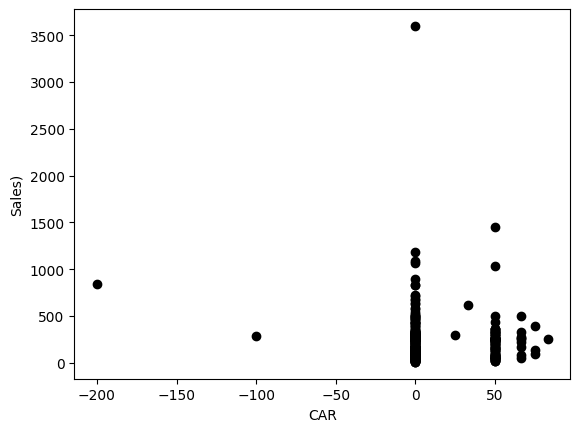

In [46]:
X=data
plt.scatter(X["CART_ABANDON_RATE"],X["SALES"],c='black')
plt.xlabel('CAR')
plt.ylabel('Sales)')
plt.show()

In [47]:
data.fillna(0, inplace=True)

In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# statistics of scaled data
pd.DataFrame(data_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,10
count,2.042000e+03,2.042000e+03,2.042000e+03,2.042000e+03,2.042000e+03,2.042000e+03,2.042000e+03,2.042000e+03,2.042000e+03,2.042000e+03,2.042000e+03
mean,-1.739821e-18,4.871498e-17,-1.278768e-16,3.566632e-17,3.566632e-17,5.523930e-17,2.870704e-16,7.829193e-17,7.829193e-17,-4.523534e-17,1.913803e-16
std,1.000245e+00,1.000245e+00,1.000245e+00,1.000245e+00,1.000245e+00,1.000245e+00,1.000245e+00,1.000245e+00,1.000245e+00,1.000245e+00,1.000245e+00
min,-2.214047e-02,-2.965367e-01,-3.452952e-01,-7.887466e-01,-7.887466e-01,-6.548447e-01,-6.703319e+00,-4.821894e-01,-4.821894e-01,-3.094251e-01,-5.734762e-01
25%,-2.214001e-02,-2.965367e-01,-3.452952e-01,-7.887466e-01,-7.887466e-01,-6.548447e-01,-6.393229e-01,-4.821894e-01,-4.821894e-01,-3.094251e-01,-5.734762e-01
50%,-2.213911e-02,-2.965367e-01,-3.452952e-01,-7.887466e-01,-7.887466e-01,-6.548447e-01,5.734762e-01,-4.821894e-01,-4.821894e-01,-3.094251e-01,-5.734762e-01
75%,-2.213595e-02,-2.965367e-01,-3.452952e-01,8.186591e-01,8.186591e-01,1.075030e+00,5.734762e-01,-4.821894e-01,-4.821894e-01,-3.094251e-01,6.393229e-01
max,4.517743e+01,2.516543e+01,9.903147e+00,8.855688e+00,8.855688e+00,7.994527e+00,5.734762e-01,2.161943e+00,2.161943e+00,3.435587e+00,6.703319e+00


In [49]:
pd.DataFrame(scaler.inverse_transform(data_scaled)).describe()

,0,1,2,3,4,5,6,7,8,9,10
count,2.042000e+03,2042.000000,2042.000000,2042.000000,2042.000000,2042.000000,2042.000000,2042.000000,2042.000000,2042.000000,2.042000e+03
mean,1.469514e+05,41.926543,1.168462,0.490695,0.490695,0.378550,76.357329,18.236206,18.236206,8.262325,2.364267e+01
std,6.638857e+06,141.421999,0.487999,0.622273,0.622273,0.578218,41.237041,37.828858,37.828858,26.708721,4.123704e+01
min,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,3.552714e-15
25%,3.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.000000,0.000000,3.552714e-15
50%,9.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,3.552714e-15
75%,3.000000e+01,0.000000,1.000000,1.000000,1.000000,1.000000,100.000000,0.000000,0.000000,0.000000,5.000000e+01
max,3.000000e+08,3600.000000,6.000000,6.000000,6.000000,5.000000,100.000000,100.000000,100.000000,100.000000,3.000000e+02


In [50]:
kmeans = KMeans(n_clusters=2, init='k-means++')
# fitting the k means algorithm on scaled data
kmeans.fit(data_scaled)

KMeans(n_clusters=2)

In [51]:
kmeans.inertia_

15005.783270723223

Text(0, 0.5, 'Inertia')

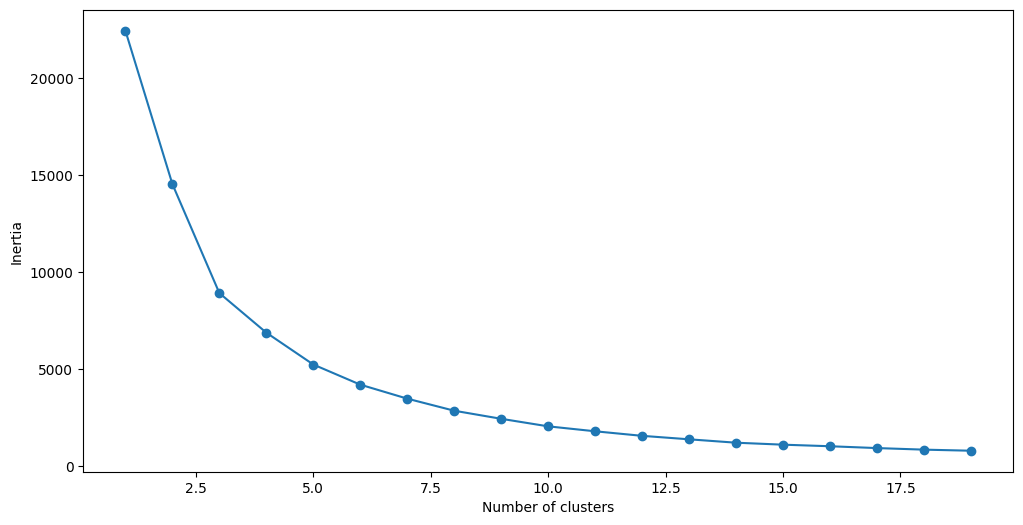

In [52]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [53]:
kmeans = KMeans(n_clusters = 5, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

In [54]:
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

cluster
1    1148
0     523
3     197
2     173
4       1
Name: count, dtype: int64

In [55]:
kmeans.cluster_centers_

array([[-2.21271836e-02,  8.14320585e-01,  1.91621264e-01,
         9.53890186e-01,  9.53890186e-01,  1.17425763e+00,
        -1.61520494e+00, -4.15201328e-01, -4.15201328e-01,
        -2.62284235e-01,  1.61520494e+00],
       [-2.21392443e-02, -2.96536697e-01, -1.75678139e-01,
        -7.88746570e-01, -7.88746570e-01, -6.54844702e-01,
         5.73476202e-01, -4.82189377e-01, -4.82189377e-01,
        -3.09425088e-01, -5.73476202e-01],
       [-2.21293325e-02, -1.54631629e-01,  6.73625057e-01,
         1.32968404e+00,  1.32968404e+00,  1.54499553e+00,
         4.21116852e-01,  1.99585654e+00,  1.99585654e+00,
         3.20035158e+00, -4.21116852e-01],
       [-2.21354519e-02, -2.96536697e-01, -7.47779567e-02,
         9.00253312e-01,  9.00253312e-01, -6.54844702e-01,
         5.73476202e-01,  2.16194268e+00,  2.16194268e+00,
        -3.09425088e-01, -5.73476202e-01],
       [ 4.51774280e+01, -2.96536697e-01, -3.45295214e-01,
        -7.88746570e-01, -7.88746570e-01, -6.54844702e-01,
  

In [ ]:
['QUANTITY','SALES','ATC_COUNT','ADD_SHIP_COUNT',
 'BEGIN_CHECKOUT_COUNT','ADD_PAYMENT_COUNT','CART_ABANDON_RATE','CHECKOUT_ABANDON_RATE',
 'SHIPPING_ABANDON_RATE','PAYMENT_ABANDON_RATE','CART_PURCHASE_RATE']

In [56]:
inversed_centers = scaler.inverse_transform(kmeans.cluster_centers_)
print(inversed_centers)

[[ 8.81529637e+01  1.57061185e+02  1.26195029e+00  1.08413002e+00
   1.08413002e+00  1.05736138e+00  9.76736776e+00  2.53346080e+00
   2.53346080e+00  1.25876354e+00  9.02326322e+01]
 [ 8.10365854e+00 -2.91322522e-13  1.08275261e+00  9.99200722e-16
   9.99200722e-16  6.66133815e-16  1.00000000e+02  1.45661261e-13
   1.45661261e-13  4.08562073e-14  1.31450406e-13]
 [ 7.38901734e+01  2.00635838e+01  1.49710983e+00  1.31791908e+00
   1.31791908e+00  1.27167630e+00  9.37186898e+01  9.37186898e+01
   9.37186898e+01  9.37186898e+01  6.28131021e+00]
 [ 3.32741117e+01  7.10542736e-15  1.13197970e+00  1.05076142e+00
   1.05076142e+00 -2.22044605e-16  1.00000000e+02  1.00000000e+02
   1.00000000e+02  1.77635684e-15  3.55271368e-15]
 [ 3.00000000e+08  0.00000000e+00  1.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  1.00000000e+02  0.00000000e+00
   0.00000000e+00  0.00000000e+00  3.55271368e-15]]


In [ ]:
# 0 = Purchasers, Hi Qty , Hi Sales -  High Value Purchasers
# 1= Pure Cart Abandoners, Low qty , Very Low Sales - Pure Abandoners , Explorers
# 2= Payment Abandoners, Hi Qty , Avg Sales -  Pricing Abandoners (Price or Payment Options)
# 3= Shipping Abandoners , Avg Qty, Very Low Sales - Avg Shipping Abandoners

In [64]:
kmeans.labels_

array([0, 0, 1, ..., 1, 1, 1], dtype=int32)

In [68]:
df['cluster'] = pred
df['cluster'].value_counts()

cluster
1    1148
0     523
3     197
2     173
4       1
Name: count, dtype: int64

In [69]:
df.head()

,USER_ID,PRICE,QUANTITY,SALES,ATC_COUNT,ADD_SHIP_COUNT,BEGIN_CHECKOUT_COUNT,ADD_PAYMENT_COUNT,PURCHASE_COUNT,CART_ABANDON_RATE,IM_CART_SHIP_ABANDON_RATE,SHIPPING_ABANDON_RATE,IM_SHIPPING_CHECKOUT_ABANDON_RATE,CHECKOUT_ABANDON_RATE,IM_CHECKOUT_PAYMENT_ABANDON_RATE,PAYMENT_ABANDON_RATE,CART_PURCHASE_RATE,cluster
70,40652857.6013892710,128.142857,219.0,897.0,1,1,1,1,1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,100.000000,0
72,6300831.9870547117,NaN,12.0,NaN,3,1,1,1,1,66.666667,66.666667,0.0,0.0,0.0,0.0,0.0,33.333333,0
76,52823631.4559930313,NaN,3.0,NaN,1,0,0,0,0,100.000000,100.000000,NaN,NaN,NaN,NaN,NaN,0.000000,1
84,4426387.2854450745,NaN,12.0,NaN,1,1,1,0,0,100.000000,0.000000,100.0,0.0,100.0,100.0,NaN,0.000000,3
92,860315047.9356025088,NaN,24.0,NaN,1,1,1,0,0,100.000000,0.000000,100.0,0.0,100.0,100.0,NaN,0.000000,3


In [72]:
df.shape

(2042, 18)

In [73]:
out_df = df[df['cluster'] != 4]

In [74]:
out_df.shape

(2041, 18)